In [1]:
import pandas as pd
from simulate_costs import *
import random
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.stats.weightstats as sms

In [2]:
saturday_demands = pd.read_csv("output/sat_bootstrap.csv").set_index("Supermarket")
saturday_demands.head()

,Run1,Run2,Run3,Run4,Run5,Run6,Run7,Run8,Run9,Run10,...,Run991,Run992,Run993,Run994,Run995,Run996,Run997,Run998,Run999,Run1000
Supermarket,,,,,,,,,,,,,,,,,,,,,
Four Square Alberton,0,0,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,0,1,0,1
Four Square Botany Junction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Four Square Cockle Bay,1,1,1,1,1,1,0,1,1,1,...,1,1,1,0,1,1,0,0,0,0
Four Square Ellerslie,1,1,1,1,1,0,1,0,0,1,...,1,0,1,1,1,1,0,1,0,1
Four Square Everglade,0,0,0,0,1,0,1,1,1,1,...,0,1,1,1,1,0,1,1,0,1


In [3]:
weekday_demands = pd.read_csv("output/weekday_bootstrap.csv").set_index("Supermarket")
weekday_demands.head()

,Run1,Run2,Run3,Run4,Run5,Run6,Run7,Run8,Run9,Run10,...,Run991,Run992,Run993,Run994,Run995,Run996,Run997,Run998,Run999,Run1000
Supermarket,,,,,,,,,,,,,,,,,,,,,
Four Square Alberton,3,1,3,2,3,2,3,2,3,3,...,3,3,1,2,2,3,3,3,2,3
Four Square Botany Junction,1,1,3,3,1,3,1,3,3,2,...,1,2,1,3,1,3,1,1,3,2
Four Square Cockle Bay,3,1,1,3,1,3,1,1,2,2,...,3,3,3,1,1,1,2,1,1,3
Four Square Ellerslie,3,3,3,1,2,1,2,1,2,2,...,2,3,3,1,1,3,1,2,1,2
Four Square Everglade,1,1,1,2,1,1,1,2,2,3,...,1,1,1,1,1,1,3,2,1,3


In [4]:
durations = pd.read_csv("../route-generation/output/TravelCosts.csv").set_index(["From", "To"])
durations.head()

Distance   Duration
From             To                                       
New World Albany New World Albany       0.00000   0.000000
                 New World Birkenhead  15.70707  23.833833
                 New World Botany      35.83163  49.946667
                 New World Browns Bay   5.00226  10.337833
                 New World Devonport   17.81659  29.654833

In [5]:
selected_saturday = pd.read_csv("../linear-program/output/selectedRoutesSaturday.csv").drop(columns="RouteNum")
selected_saturday.head()

,Route,TruckType,RouteCost
0,"['Warehouse', 'New World Papakura', ""Pak 'n Sa...",OwnedTruck,294.5460
1,"['Warehouse', 'New World Mt Roskill', 'New Wor...",OwnedTruck,192.6705
2,"['Warehouse', ""Pak 'n Save Wairau Road"", 'New ...",OwnedTruck,332.3620
3,"['Warehouse', 'New World Birkenhead', 'Four Sq...",OwnedTruck,432.4040
4,"['Warehouse', 'Four Square Alberton', 'New Wor...",OwnedTruck,260.3805


In [6]:
selected_weekday = pd.read_csv("../linear-program/output/selectedRoutesWeekday.csv").drop(columns="RouteNum")
selected_weekday.head()

,Route,TruckType,RouteCost
0,"['Warehouse', 'Four Square Glen Eden', ""Pak 'n...",OwnedTruck,317.127667
1,"['Warehouse', ""Pak 'n Save Lincoln Road"", 'War...",OwnedTruck,104.192500
2,"['Warehouse', ""Pak 'n Save Westgate"", 'Warehou...",OwnedTruck,118.685417
3,"['Warehouse', 'Four Square Everglade', 'New Wo...",OwnedTruck,271.918833
4,"['Warehouse', 'Four Square Botany Junction', '...",OwnedTruck,380.003333


In [7]:
def plot_pdf(data, integer=False, title=None, xlabel=None):
    bin_range = lambda data: range(min(data), max(data) + 2)

    fig, ax = plt.subplots()

    ax.hist(
        data,
        density=True,
        bins=bin_range(data) if integer else 50,
        rwidth=0.5 if integer else 1,
        align="left" if integer else "mid",
        alpha=0.2
    )
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Probability density")


In [8]:
def print_output_stats(sim_output):
    print(f"Mean Cost: ${round(np.mean(sim_output.Cost), 2)}")
    print(f"95% CI of Mean Cost: {sms.DescrStatsW(sim_output.Cost).tconfint_mean(alpha = 0.05)}")
    print(f"Mean Number of Mainfreight Shifts: {np.mean(sim_output.Mainfreight)}")
    print(f"Mean Number of Extra Shifts: {np.mean(sim_output.ExtraShifts)}")

In [9]:
simulated_saturday = simulate_runs(
    selected_saturday, saturday_demands, durations, "Saturday"
)
simulated_saturday.head()

,Cost,Mainfreight,ExtraShifts
Run,,,
Run1,2890.0035,0,0
Run2,2890.0035,0,0
Run3,2890.0035,0,0
Run4,2890.0035,0,0
Run5,2890.0035,0,0


In [10]:
print("Simulation of Saturday Demands")
print("------------------------------")
print_output_stats(simulated_saturday)

Simulation of Saturday Demands
------------------------------
Mean Cost: $2907.41
95% CI of Mean Cost: (2904.489270249182, 2910.3325407508187)
Mean Number of Mainfreight Shifts: 0.0
Mean Number of Extra Shifts: 0.147


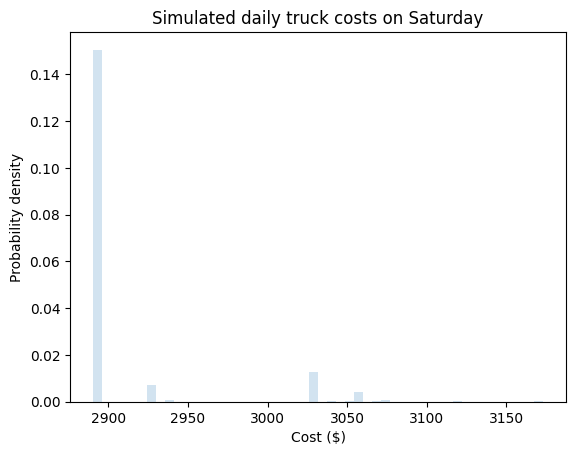

In [11]:
plot_pdf(
    simulated_saturday.Cost,
    title="Simulated daily truck costs on Saturday",
    xlabel="Cost ($)"
)

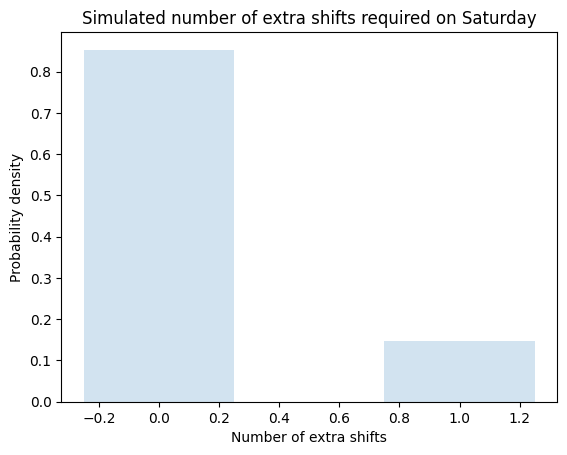

In [12]:
plot_pdf(
    simulated_saturday.ExtraShifts,
    integer=True,
    title="Simulated number of extra shifts required on Saturday",
    xlabel="Number of extra shifts"
)

In [13]:
simulated_weekday = simulate_runs(
    selected_weekday, weekday_demands, durations, "Weekdays"
)
simulated_weekday.head()

,Cost,Mainfreight,ExtraShifts
Run,,,
Run1,4781.923000,0,0
Run2,5132.597333,0,1
Run3,4781.923000,0,0
Run4,5096.735167,0,1
Run5,4969.093667,0,1


In [14]:
print("Simulation of Weekday Demands")
print("-----------------------------")
print_output_stats(simulated_weekday)

Simulation of Weekday Demands
-----------------------------
Mean Cost: $5107.65
95% CI of Mean Cost: (5065.1919373844485, 5150.10199211556)
Mean Number of Mainfreight Shifts: 0.043
Mean Number of Extra Shifts: 0.977


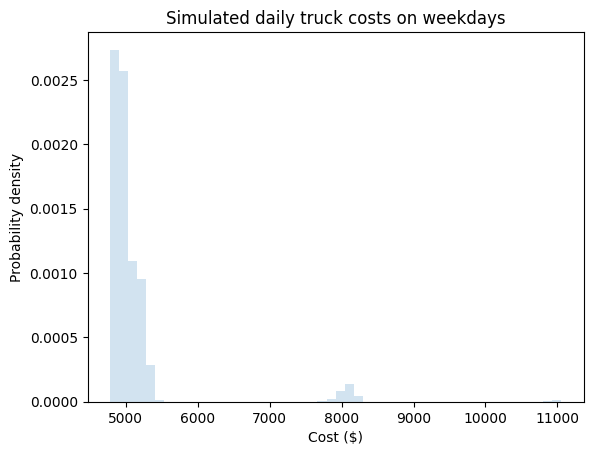

In [15]:
plot_pdf(
    simulated_weekday.Cost,
    title="Simulated daily truck costs on weekdays",
    xlabel="Cost ($)"
)

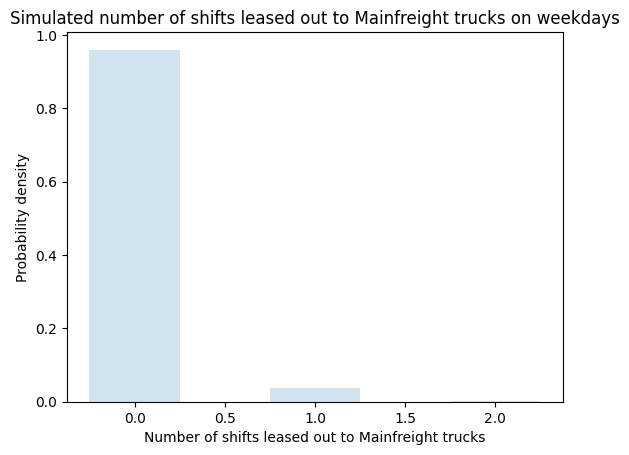

In [16]:
plot_pdf(
    simulated_weekday.Mainfreight,
    integer=True,
    title="Simulated number of shifts leased out to Mainfreight trucks on weekdays",
    xlabel="Number of shifts leased out to Mainfreight trucks"
)

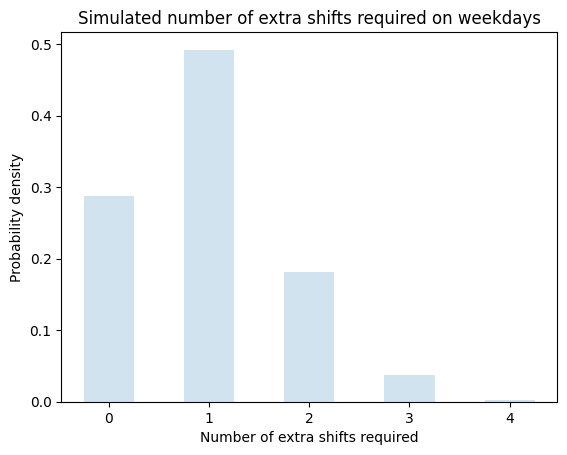

In [17]:
plot_pdf(
    simulated_weekday.ExtraShifts,
    integer=True,
    title="Simulated number of extra shifts required on weekdays",
    xlabel="Number of extra shifts required"
)